In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sqlalchemy import create_engine
engine = create_engine('postgres://postgres:pw@localhost:5432/Homework_Sql')
connection = engine.connect()

In [2]:
employees_data = pd.read_sql("SELECT * FROM Employees", connection)
salary_data = pd.read_sql("SELECT * FROM Salaries", connection)
title_data = pd.read_sql("SELECT * FROM Titles", connection)


Text(0.5, 1.0, 'Common Salary Ranges')

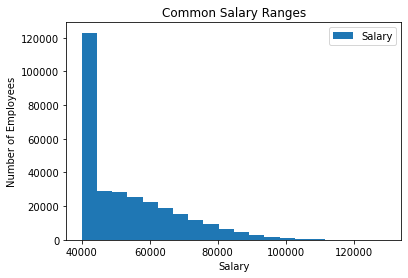

In [3]:

plt.hist(salary_data['salary'], 20, density=False, label="Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")

In [9]:
merge_df1 = pd.merge(employees_data, salary_data, on="emp_no")
merge_df1 = merge_df1.rename(columns={"emp_title_id":"title_id"})
merge_df2 = pd.merge(merge_df1, title_data, on="title_id")
merge_df2

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,72446,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,71148,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,60026,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,40000,Manager


<AxesSubplot:xlabel='title'>

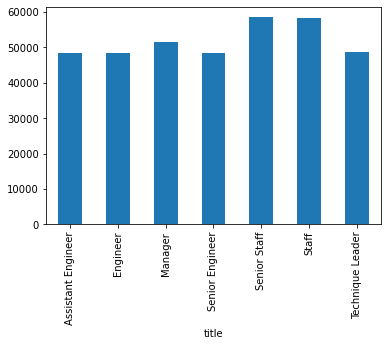

In [8]:
merge_df2 = merge_df2.replace(np.nan,0)
merge_df2 = merge_df2.groupby(['title'])['salary'].mean()

merge_df2.plot.bar()

In [10]:
epilogue = merge_df2.loc[(merge_df2['emp_no'] == 499942),:]
epilogue

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
287532,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997,40000,Technique Leader
